<a href="https://colab.research.google.com/github/LavanyaPobbathi/Lavanya_INFO5731_Fall2023/blob/main/In_class_exercise/Pobbathi_Exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 03/28/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [2]:
# Import necessary libraries
import requests  # for making HTTP requests
import csv  # for working with CSV files
from bs4 import BeautifulSoup  # for web scraping
import pandas as pd  # for data manipulation
from pprint import pprint  # for pretty printing data

# Define the URL to scrape IMDb reviews for a specific movie
url = "https://www.imdb.com/title/tt4435072/reviews/?ref_=ttrt_ql_2"

# Send an HTTP GET request to the specified URL to fetch the webpage content
data = requests.get(url)

# Parse the HTML content of the webpage using BeautifulSoup
soup = BeautifulSoup(data.content, 'html.parser')

# Create an empty list to store IMDb user reviews
imdb_reviews = []

# Find the section of the webpage that contains user reviews
right_table = soup.find('div', {'class': "lister"})

# Loop through each review item on the webpage
for i in right_table.findAll('div', class_="lister-item mode-detail imdb-user-review collapsable"):
    # Extract and append the text of each user review to the list
    imdb_reviews.append(i.find("div", class_="text show-more__control").text.strip())

# Print the IMDb user reviews to the console
pprint(imdb_reviews)

['This film is great tool to get confession out of criminals. Ananya is so '
 'pathetic that dhinchyak pooja will look in front of her. Writing is so poor '
 'looks like it is written by 5th grade student who is submitting his work on '
 'the day of deadline.',
 'Watch clouds moving in sky, cars running on road even that will be better tp '
 "than this movie.Literally couldn't even sit half way of this cringe movie.",
 'The movie is boring with a predictable story and obvious ending. Anyone '
 'would definitely feel mundane going through it and the songs are terrible. '
 "Ananya definitely doesn't know how to act. Tyson looks like a grandpa who "
 "needs pills rather than a punch to his face. Just buy some men's magazine if "
 'you wanna see ripped guys as acting is nowhere to be found here. Vijay lacks '
 "charm and charisma to pull off as a lead.Overall, a movie that's better to "
 'be given a miss.',
 'No proper story\n'
 'Hero faltu characterisation\n'
 'Hero Too much of attitude i

In [3]:
df = pd.DataFrame({'reviews': imdb_reviews})

df.to_csv('reviews.csv')
df.head()

,reviews
0,This film is great tool to get confession out ...
1,"Watch clouds moving in sky, cars running on ro..."
2,The movie is boring with a predictable story a...
3,No proper story\nHero faltu characterisation\n...
4,The only saviour of the movie is cinematograph...


In [4]:
import nltk;
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Import the nltk library for natural language processing and text analysis
import nltk

# Download the 'stopwords' dataset from NLTK, which contains common stop words
nltk.download('stopwords')

# Import the 'os' module for interacting with the operating system
import os

# Define a function to install Java, which is required for certain libraries
def install_java():
    # Install OpenJDK 8 using apt-get without displaying output
    !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null

    # Set the JAVA_HOME environment variable to the installed Java path
    os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

    # Verify the Java version
    !java -version

# Call the install_java function to install Java
install_java()

# Install the 'pyLDAvis' library, which is used for visualizing LDA (Latent Dirichlet Allocation) models
!pip install pyLDAvis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


openjdk version "11.0.20.1" 2023-08-24
OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Using cached numpy-1.26.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you h

In [6]:
# Upgrade the 'gensim' library using pip. This ensures that you have the latest version of Gensim.
!pip install --upgrade gensim

# Import the necessary libraries for web scraping, data manipulation, and natural language processing.
import requests  # for making HTTP requests
from bs4 import BeautifulSoup  # for parsing HTML content
import re  # for regular expressions
import pandas as pd  # for data handling and analysis
import numpy as np  # for numerical operations
import itertools  # for working with iterators
import lxml.html as LH  # for parsing HTML with lxml
import urllib.request as urllib2  # for handling URL requests

# Import the 'spacy.cli' module to download and manage spaCy language models.

# Download the English language model for spaCy using 'spacy.cli.download("en")'.

In [7]:
# Import the 're' module for working with regular expressions.
import re

# Import the 'numpy' library for numerical operations and array handling.
import numpy as np

# Import the 'pandas' library for data manipulation and analysis.
import pandas as pd

# Import the 'pprint' function for pretty-printing data, making it more readable.
from pprint import pprint

# Import Gensim libraries for topic modeling.
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Import 'spacy' for lemmatization, a technique to reduce words to their base or root form.
import spacy

# Import plotting tools for visualizing topic models.
import pyLDAvis
import pyLDAvis.gensim  # Import pyLDAvis with Gensim support.
import matplotlib.pyplot as plt  # Matplotlib for plotting.

# Enable logging for Gensim (optional). It sets the logging level to ERROR.
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# Suppress deprecation warnings to prevent them from cluttering the output.
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [8]:
# Import the 'nltk' library, which is used for natural language processing tasks.
import nltk

# Download the 'stopwords' dataset from NLTK, which contains common stop words in English.
nltk.download('stopwords')

# Import the 'stopwords' corpus from NLTK, which includes a list of common stop words.
from nltk.corpus import stopwords

# Create a custom list of stop words by extending the NLTK stop words list with additional words.
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Define a function 'sent_to_words' that tokenizes sentences into words using Gensim's 'simple_preprocess'.
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

# Define a function 'remove_stopwords' that removes stop words from a list of tokenized texts.
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

# Access the 'reviews' column from a DataFrame 'df' and convert it to a list of values.
rev_data = df['reviews'].values.tolist()

# Tokenize the reviews using the 'sent_to_words' function.
rev_data_words = list(sent_to_words(rev_data))

# Remove stop words from the tokenized reviews using the 'remove_stopwords' function.
rev_data_words = remove_stopwords(rev_data_words)

# Print the tokenized and stop-word-removed words from the first review.
print(rev_data_words[:1])

[['film', 'great', 'tool', 'get', 'confession', 'criminals', 'ananya', 'pathetic', 'dhinchyak', 'pooja', 'look', 'front', 'writing', 'poor', 'looks', 'like', 'written', 'th', 'grade', 'student', 'submitting', 'work', 'day', 'deadline']]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Create bigram and trigram models using Gensim's Phrases to find common phrases in the text data.
bigram = gensim.models.Phrases(rev_data_words, min_count=5, threshold=100)  # higher threshold results in fewer phrases.
trigram = gensim.models.Phrases(bigram[rev_data_words], threshold=100)

# Create Phraser objects to efficiently apply the bigram and trigram models.
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Define a function 'remove_stopwords' to remove stop words from a list of tokenized texts.
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# Define a function 'make_bigrams' to apply the bigram model to a list of texts.
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

# Define a function 'make_trigrams' to apply the trigram model to a list of texts.
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Define a function 'lemmatization' to perform lemmatization on a list of texts, considering specified part-of-speech tags.
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Remove stop words from the tokenized reviews.
data_words_nostops = remove_stopwords(rev_data_words)

# Apply the bigram model to the tokenized reviews.
data_words_bigrams = make_bigrams(data_words_nostops)

# Load the spaCy language model 'en_core_web_sm' and disable parser and named entity recognition (NER) components.
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Perform lemmatization on the text data, considering specified part-of-speech tags.
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# Print the lemmatized data from the first review.
print(data_lemmatized[:1])

[['film', 'great', 'tool', 'get', 'confession', 'criminal', 'pooja', 'look', 'front', 'write', 'poor', 'look', 'write', 'th', 'grade', 'student', 'submit', 'work', 'day', 'deadline']]


In [10]:

review_id2word = corpora.Dictionary(data_lemmatized)
review_texts = data_lemmatized
review_corpus = [review_id2word.doc2bow(text) for text in review_texts]
print(review_corpus[:1])
[[(review_id2word[i], f) for i, f in c] for c in review_corpus[:1]]

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2)]]


[[('confession', 1),
  ('criminal', 1),
  ('day', 1),
  ('deadline', 1),
  ('film', 1),
  ('front', 1),
  ('get', 1),
  ('grade', 1),
  ('great', 1),
  ('look', 2),
  ('pooja', 1),
  ('poor', 1),
  ('student', 1),
  ('submit', 1),
  ('th', 1),
  ('tool', 1),
  ('work', 1),
  ('write', 2)]]

In [11]:
review_id2word[0]

'confession'

In [12]:
# Import the 'pprint' function for pretty-printing output.
from pprint import pprint

# Create an LDA (Latent Dirichlet Allocation) model using Gensim's 'ldamodel.LdaModel'.
lda_model = gensim.models.ldamodel.LdaModel(
    corpus=review_corpus,  # The bag-of-words corpus of the text data.
    id2word=review_id2word,  # The dictionary mapping word IDs to words.
    num_topics=20,  # The number of topics to identify.
    random_state=100,  # Set a random state for reproducibility.
    update_every=1,  # How often to update the model.
    chunksize=100,  # The number of documents to use in each training chunk.
    passes=10,  # The number of times the entire corpus should be iterated.
    alpha='auto',  # Automatic setting for the alpha hyperparameter.
    per_word_topics=True  # Return per-word topic probabilities.
)

# Print the topics discovered by the LDA model.
pprint(lda_model.print_topics())

# Apply the LDA model to the document corpus to obtain topic distributions.
doc_lda = lda_model[review_corpus]

[(0,
  '0.053*"look" + 0.053*"write" + 0.027*"great" + 0.027*"student" + '
  '0.027*"submit" + 0.027*"tool" + 0.027*"th" + 0.027*"pooja" + '
  '0.027*"deadline" + 0.027*"front"'),
 (1,
  '0.064*"watch" + 0.043*"movie" + 0.022*"get" + 0.022*"screen" + 0.022*"go" + '
  '0.022*"multi" + 0.022*"half" + 0.022*"irritate" + 0.022*"slow" + '
  '0.022*"warrior"'),
 (2,
  '0.074*"bollywood" + 0.062*"film" + 0.050*"south" + 0.037*"bad" + '
  '0.037*"think" + 0.025*"make" + 0.025*"become" + 0.025*"song" + '
  '0.025*"tollywood" + 0.025*"bunch"'),
 (3,
  '0.027*"act" + 0.027*"hero" + 0.017*"vijay" + 0.014*"work" + 0.014*"faltu" + '
  '0.014*"vfx" + 0.014*"full" + 0.014*"old" + 0.014*"real" + 0.014*"reel"'),
 (4,
  '0.003*"bunch" + 0.003*"artificial" + 0.003*"level" + 0.003*"kind" + '
  '0.003*"joker" + 0.003*"idiot" + 0.003*"gym" + 0.003*"force" + 0.003*"fight" '
  '+ 0.003*"couple"'),
 (5,
  '0.055*"movie" + 0.028*"tyson" + 0.028*"give" + 0.028*"time" + 0.028*"watch" '
  '+ 0.028*"even" + 0.028*"b

In [13]:
# Calculate the coherence score for the LDA model using the 'CoherenceModel' from Gensim.
coherence_model_lda = CoherenceModel(
    model=lda_model,  # The LDA model to evaluate.
    texts=data_lemmatized,  # The lemmatized text data.
    dictionary=review_id2word,  # The dictionary mapping word IDs to words.
    coherence='c_v'  # Specify the coherence measure to use ('c_v' in this case).
)

# Obtain the coherence score.
coherence_lda = coherence_model_lda.get_coherence()

# Print the computed coherence score.
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5935057776764407


In [14]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Calculate coherence values for LDA models with varying numbers of topics.

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Maximum number of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to LDA models with different numbers of topics
    """
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        # Create an LDA model with the specified number of topics.
        model = gensim.models.ldamodel.LdaModel(
            corpus=corpus,  # The bag-of-words corpus of the text data.
            id2word=dictionary,  # The dictionary mapping word IDs to words.
            num_topics=num_topics,  # Number of topics to identify.
            random_state=100,  # Set a random state for reproducibility.
            update_every=1,  # How often to update the model.
            chunksize=100,  # The number of documents to use in each training chunk.
            passes=10,  # The number of times the entire corpus should be iterated.
            alpha='auto',  # Automatic setting for the alpha hyperparameter.
            per_word_topics=True  # Return per-word topic probabilities.
        )

        model_list.append(model)

        # Calculate the coherence score using the 'CoherenceModel' for the current model.
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')

        # Append the coherence value to the list.
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Specify parameters for the number of topics to evaluate.
start, limit, step = 2, 20, 2

# Call the 'compute_coherence_values' function to compute coherence values for various LDA models.
model_list, coherence_values = compute_coherence_values(
    dictionary=review_id2word,  # The dictionary mapping word IDs to words.
    corpus=review_corpus,  # The bag-of-words corpus of the text data.
    texts=data_lemmatized,  # The lemmatized text data.
    start=start, limit=limit, step=step  # Parameters for the number of topics to evaluate.
)

# Store and print the computed coherence values for each number of topics.
cohe_val = []
for m, cv in zip(range(start, limit, step), coherence_values):
    cohe_val.append(round(cv, 4))
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2708
Num Topics = 4  has Coherence Value of 0.2798
Num Topics = 6  has Coherence Value of 0.42
Num Topics = 8  has Coherence Value of 0.4685
Num Topics = 10  has Coherence Value of 0.4815
Num Topics = 12  has Coherence Value of 0.6084
Num Topics = 14  has Coherence Value of 0.615
Num Topics = 16  has Coherence Value of 0.6393
Num Topics = 18  has Coherence Value of 0.5358


In [15]:
sum(cohe_val)/len(cohe_val)

0.47990000000000005

In [16]:
# Choose the optimal LDA model from the list of models (index 3 in this case, corresponding to 8 topics).
optimal_model = model_list[3]

# Get the topics of the chosen LDA model.
model_topics = optimal_model.show_topics(formatted=False)

# Pretty-print the top 10 words for each topic in the LDA model.
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.048*"waste" + 0.033*"money" + 0.017*"act" + 0.017*"time" + '
  '0.017*"bollywood" + 0.017*"watch" + 0.017*"vijay" + 0.017*"sunglasse" + '
  '0.017*"stylish" + 0.017*"carrier"'),
 (1,
  '0.055*"movie" + 0.042*"watch" + 0.015*"bad" + 0.014*"feel" + 0.014*"film" + '
  '0.014*"people" + 0.008*"get" + 0.008*"director" + 0.008*"give" + '
  '0.008*"direction"'),
 (2,
  '0.052*"movie" + 0.030*"film" + 0.026*"bollywood" + 0.022*"make" + '
  '0.022*"south" + 0.022*"go" + 0.018*"bad" + 0.018*"think" + 0.018*"crap" + '
  '0.014*"story"'),
 (3,
  '0.021*"hero" + 0.020*"choice" + 0.020*"weekend" + 0.011*"movie" + '
  '0.011*"film" + 0.011*"act" + 0.011*"story" + 0.011*"donate" + '
  '0.011*"people" + 0.011*"stop"'),
 (4,
  '0.016*"production" + 0.016*"school" + 0.016*"second" + 0.016*"need" + '
  '0.016*"tumse" + 0.016*"bollywood" + 0.016*"horrible" + 0.016*"put" + '
  '0.016*"house" + 0.016*"bulking"'),
 (5,
  '0.062*"movie" + 0.021*"act" + 0.021*"watch" + 0.021*"increase" + '
  '0.014*"s

## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [17]:
# Write your code here
# Import the LsiModel class from Gensim.
from gensim.models import LsiModel

# Create an LSI (Latent Semantic Indexing) model using Gensim's 'LsiModel'.
lsamodel = LsiModel(
    review_corpus,  # The bag-of-words corpus of the text data.
    num_topics=10,  # The number of topics to identify.
    id2word=review_id2word  # The dictionary mapping word IDs to words.
)

# Print the top 10 words for each of the 10 topics in the LSI model.
print(lsamodel.print_topics(num_topics=10, num_words=10))






[(0, '-0.735*"movie" + -0.178*"bad" + -0.159*"watch" + -0.158*"make" + -0.147*"crap" + -0.137*"money" + -0.136*"act" + -0.129*"even" + -0.119*"go" + -0.118*"film"'), (1, '-0.566*"bollywood" + -0.377*"south" + -0.339*"film" + -0.277*"bad" + 0.273*"movie" + -0.191*"think" + -0.180*"tollywood" + -0.178*"become" + -0.111*"make" + -0.103*"stop"'), (2, '0.325*"crap" + 0.236*"make" + 0.227*"act" + 0.193*"instead" + -0.177*"bollywood" + 0.172*"bad" + 0.134*"director" + -0.133*"movie" + -0.133*"song" + 0.132*"want"'), (3, '-0.242*"idea" + -0.229*"good" + 0.217*"crap" + -0.209*"get" + -0.204*"act" + -0.194*"start" + -0.171*"bad" + -0.158*"still" + -0.152*"actor" + 0.152*"totally"'), (4, '-0.296*"money" + -0.269*"waste" + 0.210*"stay" + 0.210*"away" + -0.202*"bad" + -0.181*"time" + 0.169*"increase" + 0.160*"feel" + 0.143*"start" + 0.133*"big"'), (5, '0.368*"act" + 0.351*"vijay" + 0.207*"watch" + 0.151*"go" + -0.148*"movie" + 0.133*"people" + -0.131*"increase" + 0.129*"stammer" + 0.122*"give" + 0.

In [18]:
def compute_lsa_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Calculate coherence values for LSA models with varying numbers of topics.

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Maximum number of topics

    Returns:
    -------
    model_list : List of LSA models
    coherence_values : Coherence values corresponding to LSA models with different numbers of topics
    """
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        # Create an LSA model with the specified number of topics.
        lsamodel = LsiModel(corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(lsamodel)

        # Calculate the coherence score using the 'CoherenceModel' for the current LSA model.
        coherencemodel = CoherenceModel(model=lsamodel, texts=texts, dictionary=dictionary, coherence='c_v')

        # Append the coherence value to the list.
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Specify parameters for the number of topics to evaluate.
start, limit, step = 2, 20, 2

# Call the 'compute_lsa_coherence_values' function to compute coherence values for various LSA models.
model_lsa, coherence_values = compute_lsa_coherence_values(
    dictionary=review_id2word,  # The dictionary mapping word IDs to words.
    corpus=review_corpus,  # The bag-of-words corpus of the text data.
    texts=data_lemmatized,  # The lemmatized text data.
    start=start, limit=limit, step=step  # Parameters for the number of topics to evaluate.
)

# Store and print the computed coherence values for each number of topics.
coherence_values_all = []
for m, cv in zip(range(start, limit, step), coherence_values):
    coherence_values_all.append(round(cv, 4))
    print("Topic no =", m, " it's Coherence Value is", round(cv, 4))

Topic no = 2  it's Coherence Value is 0.5496
Topic no = 4  it's Coherence Value is 0.5471
Topic no = 6  it's Coherence Value is 0.554
Topic no = 8  it's Coherence Value is 0.4809
Topic no = 10  it's Coherence Value is 0.473
Topic no = 12  it's Coherence Value is 0.5032
Topic no = 14  it's Coherence Value is 0.5693
Topic no = 16  it's Coherence Value is 0.4726
Topic no = 18  it's Coherence Value is 0.4735


In [19]:
# Calculate the coherence score for the LSA model using the 'CoherenceModel' from Gensim.
coherencemodel = CoherenceModel(
    model=lsamodel,  # The LSA model to evaluate.
    texts=data_lemmatized,  # The lemmatized text data.
    dictionary=review_id2word,  # The dictionary mapping word IDs to words.
    coherence='c_v'  # Specify the coherence measure to use ('c_v' in this case).
)

# Print the computed coherence score.
print(coherencemodel.get_coherence())

0.4626227166225728


In [20]:
coherence_values_all

[0.5496, 0.5471, 0.554, 0.4809, 0.473, 0.5032, 0.5693, 0.4726, 0.4735]

In [21]:
# Calculate the average coherence value by summing all the coherence values and dividing by the total number of values.
average_coherence = sum(coherence_values_all) / len(coherence_values_all)

# Print the computed average coherence value.
print("Average Coherence Value:", average_coherence)

Average Coherence Value: 0.5136888888888889


## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [22]:
# Write your code here

# Suppress deprecation warnings to prevent them from cluttering the output.
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


# Download all NLTK data packages.
nltk.download('all')

# Install the 'preprocess' package using pip.
!pip install preprocess

# Import necessary libraries for visualization and data analysis.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Enable and initialize the pyLDAvis library for interactive visualization.
import pyLDAvis
pyLDAvis.enable_notebook()



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

In [23]:
# Initialize the number of top words to extract per topic.
top_value = 10

# Create a dictionary to store the top words for each topic.
top_topic_words = {}

# Loop through the topics and their associated words.
for j, topic_to_word in enumerate(df.reviews.tolist()):
    # Sort the words in descending order based on their importance in the topic.
    top_words = np.argsort(topic_to_word)[::-1][:top_value]

    # Prepare a message to display the topic and its top words.
    msg = 'Topic %i ' % j
    top_words_list = [df.reviews.tolist()[i].strip()[:35] for i in top_words]
    msg += 'has stop words '.join(top_words_list)

    # Print the message.
    print(msg)

    # Store the top words for the current topic in the dictionary.
    top_topic_words[j] = top_words_list

Topic 0 This film is great tool to get conf
Topic 1 This film is great tool to get conf
Topic 2 This film is great tool to get conf
Topic 3 This film is great tool to get conf
Topic 4 This film is great tool to get conf
Topic 5 This film is great tool to get conf
Topic 6 This film is great tool to get conf
Topic 7 This film is great tool to get conf
Topic 8 This film is great tool to get conf
Topic 9 This film is great tool to get conf
Topic 10 This film is great tool to get conf
Topic 11 This film is great tool to get conf
Topic 12 This film is great tool to get conf
Topic 13 This film is great tool to get conf
Topic 14 This film is great tool to get conf
Topic 15 This film is great tool to get conf
Topic 16 This film is great tool to get conf
Topic 17 This film is great tool to get conf
Topic 18 This film is great tool to get conf
Topic 19 This film is great tool to get conf
Topic 20 This film is great tool to get conf
Topic 21 This film is great tool to get conf
Topic 22 This film i

<BarContainer object of 20 artists>

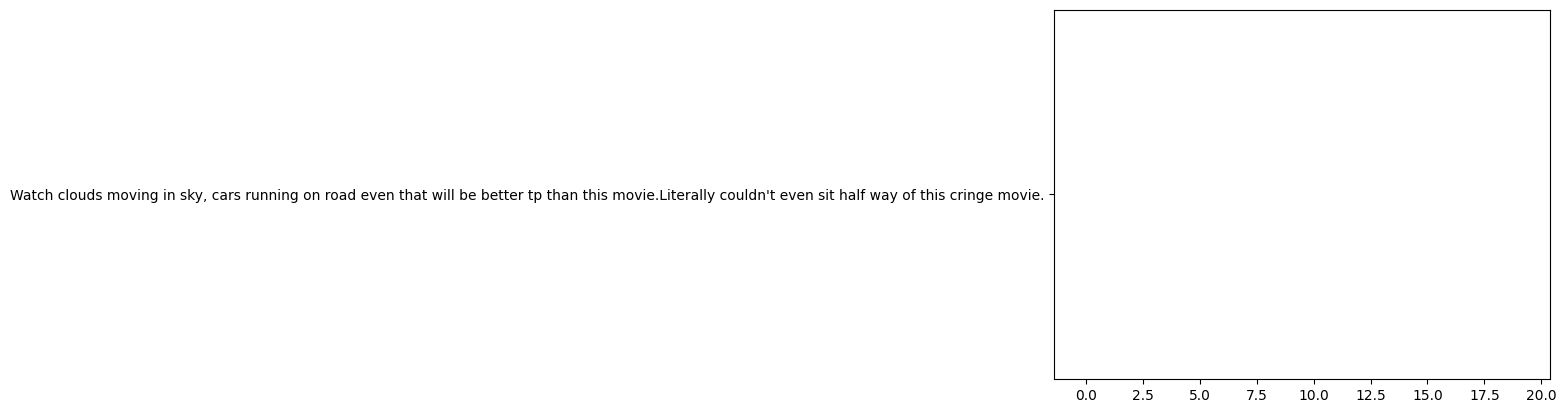

In [24]:
plt.bar(np.arange(20), df.reviews.tolist()[1])

## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [42]:
# Write your code here

!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 38.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.6 MB/s eta 0:00:00
  Preparing metadata (

In [25]:
# Import the BERTopic library.
from bertopic import BERTopic

# Create a BERTopic model with specific configuration settings.
topic_model = BERTopic(
    language="english",  # Specify the language for text processing (English in this case).
    calculate_probabilities=True,  # Calculate topic probabilities for each document.
    verbose=True  # Enable verbose mode for more detailed output.
)

# Fit the BERTopic model to the list of text reviews from 'df.reviews.tolist()'.
topics, probs = topic_model.fit_transform(df.reviews.tolist())

# Get the topic information and store it in the 'freq' DataFrame.
freq = topic_model.get_topic_info()

# Display the top 5 rows of the 'freq' DataFrqZame to inspect the topic information.
freq.head(5)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2023-11-05 22:13:17,495 - BERTopic - Transformed documents to Embeddings
2023-11-05 22:13:30,188 - BERTopic - Reduced dimensionality
2023-11-05 22:13:30,202 - BERTopic - Clustered reduced embeddings


,Topic,Count,Name,Representation,Representative_Docs
0,-1,25,-1_big_the_and_is,"[big, the, and, is, flop, of, movie, this, to,...",[What can I say ? I expected nothing from this...


In [26]:
topic_model.get_topic(-1)

[('big', 0.13733160096411423),
 ('the', 0.10381524364856001),
 ('and', 0.10077218288063851),
 ('is', 0.10077218288063851),
 ('flop', 0.09454612049005799),
 ('of', 0.08811843061323613),
 ('movie', 0.07976749117661171),
 ('this', 0.07456845329703204),
 ('to', 0.07280107798697749),
 ('flopa', 0.0692113105917176)]

In [27]:
topic_model.visualize_term_rank()

In [28]:
topic_model.update_topics(df.reviews.tolist(), n_gram_range=(1, 2))
topic_model.visualize_term_rank()

## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

In [29]:
# Write your answer here (no code needed for this question)

''' LSA (Latent Semantic Analysis):
LSA, or Latent Semantic Analysis, is a technique that models subjects by breaking down matrices and determining their associations with terms. It reduces dimensions in the process. However, it might be challenging to interpret when loadings onto terms contain negative values. LSA relies on two main inputs: a dictionary and a corpus.

LDA (Latent Dirichlet Allocation):
LDA, short for Latent Dirichlet Allocation, connects words mentioned in a text with other phrases from the same documents. One of its notable strengths is its ability to handle complex words with ease. In product reviews, LDA often produces comparable results for both highly-rated and poorly-rated items. LDA excels at extracting information from the original document matrix while preserving important topics. This capability can lead to superior results compared to using BERT and LDA together.
'''



' LSA (Latent Semantic Analysis):\nLSA, or Latent Semantic Analysis, is a technique that models subjects by breaking down matrices and determining their associations with terms. It reduces dimensions in the process. However, it might be challenging to interpret when loadings onto terms contain negative values. LSA relies on two main inputs: a dictionary and a corpus.\n\nLDA (Latent Dirichlet Allocation):\nLDA, short for Latent Dirichlet Allocation, connects words mentioned in a text with other phrases from the same documents. One of its notable strengths is its ability to handle complex words with ease. In product reviews, LDA often produces comparable results for both highly-rated and poorly-rated items. LDA excels at extracting information from the original document matrix while preserving important topics. This capability can lead to superior results compared to using BERT and LDA together.\n'